# Basics of Linear Regression

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# this allows plots to appear directly in the notebook
%matplotlib inline

Let's take a look at some data, ask some questions about that data, and then use Linear regression to answer those questions.

In [2]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()
data.columns = ['TV','Radio','Newspaper','Sales']

 **Indepenent variables**
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

**Target Variable **
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

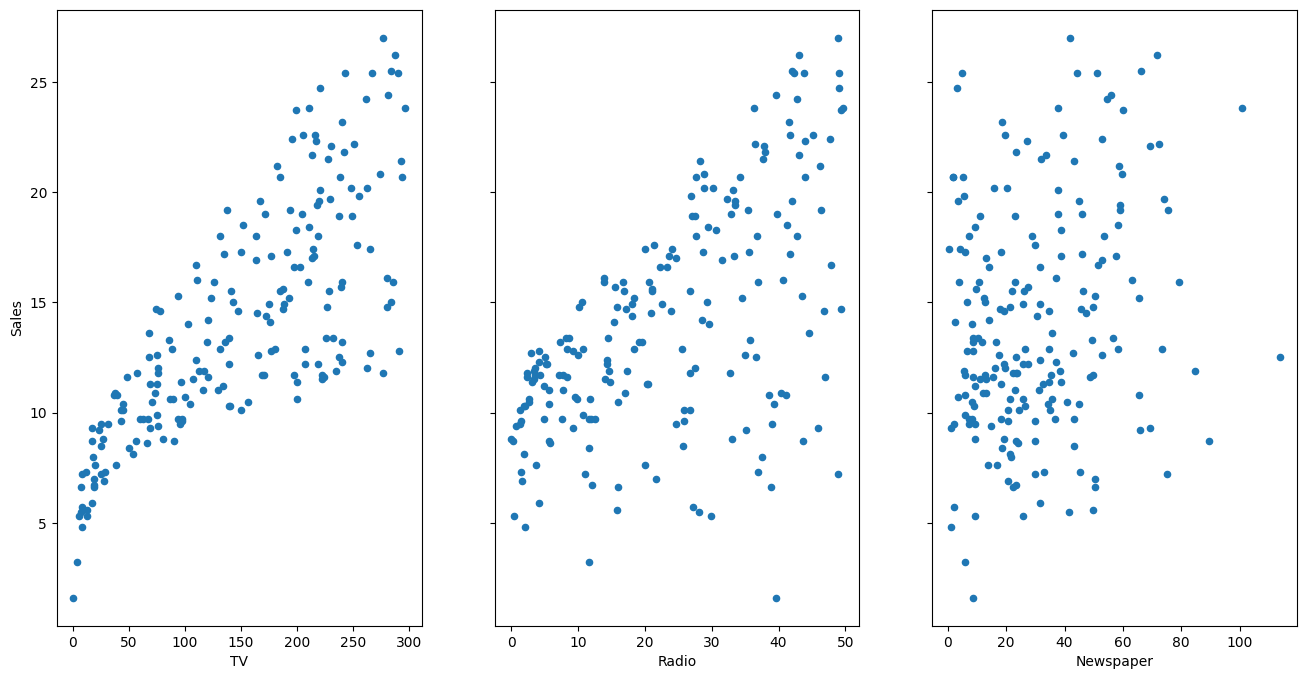

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

On the basis of this data, how should you spend advertising money in the future?
These general questions might lead you to more specific questions:

1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?

Exploring these questions below.

In [5]:
# create X and y
#taking only one variable for now
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


## Interpreting Model Coefficients

How do you interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending was **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads was **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. How would you predict the sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [6]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, you would predict Sales of **9,409 widgets** in that market.

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.40942557])

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [9]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

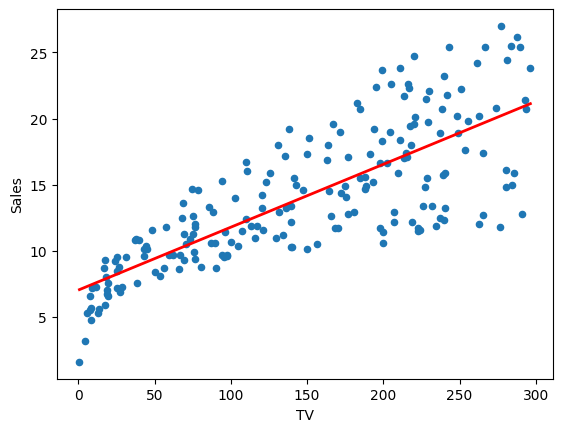

In [11]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [12]:

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)


In [13]:
xtrain,ytrain

(        TV  Radio  Newspaper
 170  284.3   10.6        6.4
 98   184.9   21.0       22.0
 32   112.9   17.4       38.6
 13    23.8   35.1       65.9
 36   290.7    4.1        8.5
 ..     ...    ...        ...
 107   25.0   11.0       29.7
 15   204.1   32.9       46.0
 93   217.7   33.5       59.0
 180  165.6   10.0       17.6
 103  280.2   10.1       21.4
 
 [140 rows x 3 columns],
 170    15.0
 98     15.5
 32     11.9
 13      9.2
 36     12.8
        ... 
 107     7.2
 15     19.0
 93     19.4
 180    12.6
 103    14.8
 Name: Sales, Length: 140, dtype: float64)

In [14]:
#without using train and test split dataset
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)


2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [15]:
xtest

,TV,Radio,Newspaper
96,163.3,31.6,52.9
16,195.4,47.7,52.9
31,292.9,28.3,43.2
159,11.7,36.9,45.2
129,220.3,49.0,3.2
116,75.1,35.0,52.7
70,216.8,43.9,27.2
171,50.0,11.6,18.4
175,222.4,3.4,13.1
46,175.1,22.5,31.5


In [16]:
predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))

1.8159758162002484


In [17]:
predictions

array([16.31492112, 20.81929952, 21.6339338 , 10.38419866, 22.25549161,
       12.91968895, 21.10891244,  7.39497997, 13.74435742, 15.16152314,
        9.01603163,  6.55467   , 14.22372138,  8.81331353,  9.69137313,
       12.1620464 ,  8.52771254, 16.3600003 , 10.17840799, 18.97657924,
       19.45441306, 12.82365674, 12.26335941, 21.22757378,  7.84904532,
        5.74215558, 20.78136464, 12.0370073 ,  9.12734958,  8.44915012,
       12.55084872,  9.95168206, 21.2926106 , 11.85832174, 18.36720534,
       20.30110878, 14.00141385, 20.85125198, 11.0682946 ,  4.47758904,
        9.67530328, 12.78592082,  9.90868103,  8.14651887, 13.6264571 ,
        5.37034248,  9.14402389, 14.16607293,  8.76480262, 11.59870739,
       15.30509593, 11.97093887, 12.47834763, 10.57717411,  6.5707774 ,
        9.90298206,  9.48964097, 24.11860723,  7.60769238, 12.63571716])

In [18]:
ytest

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
116    12.6
70     22.3
171     8.4
175    11.5
46     14.9
67      9.5
183     8.7
166    11.9
79      5.3
187    10.3
178    11.7
57      5.5
153    16.6
83     11.3
69     18.9
125    19.7
17     12.5
149    10.9
94     22.2
66      9.3
61      8.1
85     21.7
68     13.4
126    10.6
133     5.7
10     10.6
19     11.3
56     23.7
76      8.7
151    16.1
105    20.7
136    11.6
138    20.8
165    11.9
77      6.9
80     11.0
198    12.8
39     10.1
25      9.7
123    11.6
196     7.6
30     10.5
20     14.6
144    10.4
87     12.0
115    14.6
174    11.7
6       7.2
127     6.6
118     9.4
74     11.0
141    10.9
99     25.4
173     7.6
97     11.7
Name: Sales, dtype: float64

In [19]:
import tabulate
prediction_table = pd.DataFrame(columns=["Predicted Value", "True Value"])
prediction_table["Predicted Value"] = predictions
prediction_table["True Value"] = ytest
print(tabulate.tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+-------------------+--------------+
|    | Predicted Value   | True Value   |
|----+-------------------+--------------|
| 0  | 16.3149           | nan          |
| 1  | 20.8193           | nan          |
| 2  | 21.6339           | nan          |
| 3  | 10.3842           | nan          |
| 4  | 22.2555           | nan          |
| 5  | 12.9197           | nan          |
| 6  | 21.1089           | 7.2          |
| 7  | 7.39498           | nan          |
| 8  | 13.7444           | nan          |
| 9  | 15.1615           | nan          |
| 10 | 9.01603           | 10.6         |
| 11 | 6.55467           | nan          |
| 12 | 14.2237           | nan          |
| 13 | 8.81331           | nan          |
| 14 | 9.69137           | nan          |
| 15 | 12.162            | nan          |
| 16 | 8.52771           | 22.4         |
| 17 | 16.36             | 12.5         |
| 18 | 10.1784           | nan          |
| 19 | 18.9766           | 11.3         |
| 20 | 19.4544           | 14.6   